### Оценка используемых источников

In [249]:
!pip3 install OSMPythonTools
!pip install overpy
!pip install geopy
!pip install geonames
!pip install pyproj

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10759 sha256=322dad9c25419cfab23c0e1f9e1de5b6240270e30de68363ea52a247c6273b43
  Stored in directory: c:\users\kingo\appdata\local\pip\cache\wheels\9c\ea\66\8e45247b09052a933eb1a680b7c64802298faba58aac9b346b
Successfully built unicodecsv
  Obtaining dependency information for pyproj from https://files.pythonhosted.org/packages/89/8f/27350c8fba71a37cd0d316f100fbd96bf139cc2b5ff1ab0dcbc7ac64010a/pyproj-3.6.1-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/6.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/6.1 MB 3.4 MB/s eta 0:00:02
   - -------------------------------------- 0.2/6.1 MB 2.1 MB/s eta 0:00:03
   -- ------------------------------------- 0.4/6.1 MB 2.8 MB/s eta 0:00:03
   ---- ----------------------------------- 0.7/6.1 MB 3.4 MB/s eta 0:00:02
 

In [251]:
import requests
import random
from shapely.geometry import Polygon
from shapely.ops import transform
import pyproj



geonames_username = 'kingofsweetsx2k'

base_url = 'http://api.geonames.org/searchJSON'
params = {
    'q': 'Russia',
    'country': 'RU',
    'featureClass': 'P',
    'lang':'ru',
    'maxRows': 1000,
    'username': geonames_username,
}

response = requests.get(base_url, params=params)
print(response.text)
if response.status_code == 200:
    data = response.json()
    cities = [entry['name'] for entry in data['geonames']]
    print(cities)


{"totalResultsCount":201458,"geonames":[{"adminCode1":"48","lng":"37.61556","geonameId":524901,"toponymName":"Moscow","countryId":"2017370","fcl":"P","population":10381222,"countryCode":"RU","name":"Москва","fclName":"city, village,...","adminCodes1":{"ISO3166_2":"MOW"},"countryName":"Россия","fcodeName":"столица политического образования","adminName1":"Москва","lat":"55.75222","fcode":"PPLC"},{"adminCode1":"66","lng":"30.31413","geonameId":498817,"toponymName":"Saint Petersburg","countryId":"2017370","fcl":"P","population":5351935,"countryCode":"RU","name":"Санкт-Петербург","fclName":"city, village,...","adminCodes1":{"ISO3166_2":"SPE"},"countryName":"Россия","fcodeName":"центр административного деления первого порядка","adminName1":"Санкт-Петербург","lat":"59.93863","fcode":"PPLA"},{"adminCode1":"65","lng":"50.15","geonameId":499099,"toponymName":"Samara","countryId":"2017370","fcl":"P","population":1163399,"countryCode":"RU","name":"Самара","fclName":"city, village,...","adminCodes1

In [228]:
cities

['Москва',
 'Санкт-Петербург',
 'Самара',
 'Красноярск',
 'Воронеж',
 'Екатеринбург',
 'Омск',
 'Краснодар',
 'Пенза',
 'Уфа',
 'Ярославль',
 'Волгоград',
 'Владивосток',
 'Хабаровск',
 'Иркутск',
 'Благовещенск',
 'Новосибирск',
 'Кемерово',
 'Тюмень',
 'Томск',
 'Челябинск',
 'Барнаул',
 'Нижний Новгород',
 'Оренбург',
 'Липецк',
 'Смоленск',
 'Саратов',
 'Казань',
 'Ижевск',
 'Тверь',
 'Киров',
 'Владикавказ',
 'Южно-Сахалинск',
 'Кызыл',
 'Грозный',
 'Мурик',
 'Чебоксары',
 'Калининград',
 'Астрахань',
 'Петропавловск-Камчатский',
 'Ханты-Мансийск',
 'Пермь',
 'Ростов-на-Дону',
 'Махачкала',
 'Сыктывкар',
 'Ульяновск',
 'Петрозаводск',
 'Армавир',
 'Тула',
 'Владимир',
 'Вологда',
 'Чита',
 'Магадан',
 'Курган',
 'Брянск',
 'Иваново',
 'Белгород',
 'Майкоп',
 'Псков',
 'Орёл',
 'Кострома',
 'Рязань',
 'Саранск',
 'Элиста',
 'Тамбов',
 'Ставрополь',
 'Калуга',
 'Курск',
 'Архангельск',
 'Йошкар-Ола',
 'Елец',
 'Выборг',
 'Якутск',
 'Улан-Удэ',
 'Ангарск',
 'Находка',
 'Новокузнецк',

In [193]:
import overpy
from geopy.distance import great_circle
import numpy as np

api = overpy.Overpass()
result = api.query("""
area[name="Таганрог"];
(
  node["amenity"~"fast_food|biergarten|restaurant|cafe|food_court|ice_cream|pub"](area);

);
out body;
""")


In [175]:
import overpy
api = overpy.Overpass()

points = {
    "negative": {
        "values": ["wine_shop","alcohol","drinks","food_court","electronic_cigarettes","tobacco", "adult_gaming_centre","amusement_arcade","bar","biergarten","fast_food","cafe","ice_cream","pub"],
        "key": "amenity"
    },
    "positive": {
        "values": ["bandstand", "bathing_place", "beach_resort", "bowling_alley", "dance", "disc_golf_course", "escape_game", "firepit", "fishing", "fitness_centre", "fitness_station", "garden", "golf_course", "horse_riding", "ice_rink", "ice_rink", " miniature_golf", "nature_reserve", "park", "pitch", "playground", "exhibition_centre", "music_venue", "shelter", "animal_training", "dive_centre", "public_bath"],
        "key": "leisure"
    },
    "main_city": {
        "values": ["university","college","school","kindergarten","language_school","music_school"],
        "key": "amenity"
    }
}

def get_points(reg = "Таганрог", type = "positive"):
    result = api.query(f"""
    area[name="{reg}"];
    (
        node["{points[type]['key']}"~"{'|'.join(points[type]['values'])}"](area);
    );
    out body;
    """)


    return result

In [273]:
def get_reg_based(city):
    result = api.query(f"""
    area[name="{city}"];
    /*added by auto repair*/
    (._;>;);
    /*end of auto repair*/

    out body;
    """)

    resp = result.areas[0].tags
    return str(resp.get('place')), str(resp.get('population')),  str(resp.get('addr:country')), str(resp.get('addr:region'))

In [266]:
get_reg_based('Таганрог')

('city', '251050', 'RU', 'Ростовская область')

In [258]:
def get_green_area(city_name):
    query = f"""
    area[name="Екатеринбург"];
    (
        way["leisure"="park"](area);
        way["leisure"="square"](area);
        way["landuse"="recreation_ground"](area);
        way["landuse"="forest"](area);
    );
    /*added by auto repair*/
    (._;>;);
    /*end of auto repair*/
    out geom;
    """

    result = api.query(query)

    total_area = 0

    for way in result.ways:
        coords = [(node.lon, node.lat) for node in way.nodes]
        polygon = Polygon(coords)
        projected_polygon = transform(pyproj.Transformer.from_crs(4326, 3857, always_xy=True).transform, polygon)
        area = projected_polygon.area
        total_area += area
    print(f"Площадь зеленых зон в {city_name}: {total_area} квадратных метров")
    return total_area

def get_transport_density(city_name):
    city_name = "Название Вашего Города"
    query = f"""
        area[name="Екатеринбург"];
        (
            relation["route"~"bus|subway|tram"](area);
            node["public_transport"~"platform"](area);
        );
        out geom;
        """

    result = api.query(query)

    number_of_routes = len(result.relations)
    number_of_stops = len(result.nodes)
    region_area = result.area[0].tags.get("area:highway")

    if region_area is not None:
        region_area = float(region_area)
        density = (number_of_routes + number_of_stops) / region_area
        print(f"Плотность общественного транспорта: {density} на квадратный метр")
        return density
    else:
        return None
        print("Площадь региона не найдена. Невозможно вычислить плотность транспорта.")


In [257]:
def get_reg_points(reg = "Таганрог"):
    points_data_loacl = pd.DataFrame(columns = ['name', 'obj_type', 'type', 'geo', 'lat', 'lon'])
    types = ["negative", "positive", "main_city"]
    for type in types:
        resp  = get_points(reg, type = type)
        names = []
        obj_type = []
        latitudes = []
        longitudes = []

        for node in resp.nodes:
            names.append(node.tags.get("name"))
            obj_type.append(node.tags.get(points[type]['key']))
            latitudes.append(node.lat)
            longitudes.append(node.lon)

        points_data_loacl = pd.concat([points_data_loacl, pd.DataFrame({'name': names, 'obj_type': obj_type, 
        'type': type, 'lat': latitudes, 'lon': longitudes})], ignore_index=True)
    
    return points_data_loacl

def calculate_distance(lat1, lon1, lat2, lon2):
    coords_1 = (lat1, lon1)
    coords_2 = (lat2, lon2)
    return great_circle(coords_1, coords_2).meters

def count_negative_points_near_positive(df, max_distance=100):
    count = 0
    for index, row in df.iterrows():
        if row['type'] == 'positive':
            for i, r in df.iterrows():
                if r['type'] == 'negative':
                    distance = calculate_distance(row['lat'], row['lon'], r['lat'], r['lon'])
                    if distance <= max_distance:
                        count += 1
                        break
    return count

def calculate_average_distance(df, max_distance=200):
    distances = []

    for index, row in df.iterrows():
        if row['type'] == 'negative':
            distances_to_positive = []

            for i, r in df.iterrows():
                if r['type'] == 'positive':
                    distance = calculate_distance(row['lat'], row['lon'], r['lat'], r['lon'])
                    if distance <= max_distance:
                        distances_to_positive.append(distance)

            if distances_to_positive:
                distances.append(np.mean(distances_to_positive))

    if distances:
        return np.mean(distances)
    else:
        return None



In [255]:
points_data = get_reg_points("Екатеринбург")

_______________________________
['Чудо Печка', 'The Rosy Jane', 'Дебют', 'Городские цветы', 'KFC', 'Кардиган', 'Рич', 'Пир', 'Pizza Mia', 'Вилы', 'Дудки', 'ТриО', 'Поль Бейкери', 'Пан Сметан', 'Family House', 'Кировское', 'Шарташ', 'Золотая середина', 'Никита', 'Макдоналдс', 'Глухомань', 'ЦКиИ Верх-Исетский', 'Мак Пик', None, 'Макдоналдс', 'Макдоналдс', 'Pizza Mia', 'Boozer Pub', 'Макдоналдс', 'Подсолнухи', 'Аура', 'Поль Бейкери', 'Своя компания', 'Своя компания', None, 'Пан Пицца', 'Уралочка', None, 'Brodsky', 'Столовая № 2', 'Академическая', 'Автостанция', 'кафе Майское', 'Аль-Кух', 'БлиноФФ', 'БлиноФФ', 'Карнавал', 'Успенский', 'Лукоморье', 'Блокпост', 'Старый Дублин', 'Партия', 'Цыплята', 'Поешь -ка', 'ИНВЕСТТОРГ, столовая', 'ООО Электрон', 'на Первомайской, 75', 'фонбет', 'Шейк', 'Agave', 'Кулинария Космос', 'Doctor Scotch Pub', 'Люкс', 'Заравшан', 'NewBar', 'Мардек', 'Штолле', 'Изумруд', 'Петров двор', 'Резиденция губернатора', 'Резиденция президента', 'Поль Бейкери', 'Пельмешка'

In [189]:
points_data['bad_dist_count'] = count_negative_points_near_positive(points_data)

In [194]:
points_data['average_distance'] = calculate_average_distance(points_data)

In [195]:
points_data

,name,obj_type,type,geo,lat,lon,bad_dist_count,average_distance
0,Чудо Печка,fast_food,negative,NaN,56.8867676,60.5917306,73,121.689166
1,The Rosy Jane,bar,negative,NaN,56.8379424,60.6080203,73,121.689166
2,Дебют,cafe,negative,NaN,56.8387088,60.5980720,73,121.689166
3,Городские цветы,cafe,negative,NaN,56.8311531,60.6028251,73,121.689166
4,KFC,fast_food,negative,NaN,56.8310090,60.6014032,73,121.689166
...,...,...,...,...,...,...,...,...
1660,KIBERone,school,main_city,NaN,56.8317956,60.5895638,73,121.689166
1661,KIBERone,school,main_city,NaN,56.8368990,60.6227130,73,121.689166
1662,KIBERone,school,main_city,NaN,56.8265699,60.5864841,73,121.689166
1663,KIBERone,school,main_city,NaN,56.8363866,60.5654833,73,121.689166


In [278]:
def collect_all_data(cities):
    dataset = pd.DataFrame(columns = [
        'city', 'positive_count',
        'green_zone', 'place', 'population', 'country', 'region',
        # 'transport_desteny',
        'negative_count', 'main_city_count', 
        # 'average_distance', 'bad_dist_count'
    ])
    
    for city in cities:
        points_data = get_reg_points(city)
        green_zone = get_green_area(city)
        # transport_desteny = get_transport_density(city)
        place, population, country, region = get_reg_based(city)
        print(place, population, country, region)
        if population == None: population = "None"
        if country == None: country = "None"
        if region == None: region = "None"
        if place == None: place = "None"

        positive_count = len(points_data[points_data['type'] == 'positive'])
        negative_count = len(points_data[points_data['type'] == 'negative'])
        main_city_count = len(points_data[points_data['type'] == 'main_city'])
        print(f"P|N|M: {positive_count}|{negative_count}|{main_city_count}")
        
        # if negative_count > 0:
        #     average_distance = calculate_average_distance(points_data)
        #     bad_dist_count = count_negative_points_near_positive(points_data)
        # else:
        #     average_distance = np.nan

        raw_data = pd.DataFrame({'city': city, 'positive_count': positive_count, 
                                  'negative_count': negative_count, 'main_city_count': main_city_count, 
                                  'green_zone': green_zone, #'transport_desteny':transport_desteny,
                                  'place': place, 'population': population, 'country': country, 'region': region
                                #   'average_distance': average_distance, 'bad_dist_count': str(bad_dist_count)
                                  }, index = [0])
        # points_data_loacl = pd.concat([points_data_loacl, pd.DataFrame({'name': names, 'obj_type': obj_type, 
        # 'type': type, 'lat': latitudes, 'lon': longitudes})], ignore_index=True)
        dataset = pd.concat([dataset, raw_data], ignore_index=True)
    
    return dataset


In [279]:
main_data = collect_all_data(cities)

Площадь зеленых зон в Москва: 56763982.9153802 квадратных метров
None None RU None
P|N|M: 4946|9471|983
Площадь зеленых зон в Санкт-Петербург: 56763982.9153802 квадратных метров
None 5377503 RU None
P|N|M: 1445|6557|810
Площадь зеленых зон в Самара: 56763982.9153802 квадратных метров
None None None None
P|N|M: 133|483|129
Площадь зеленых зон в Красноярск: 56763982.9153802 квадратных метров
city 1092851 RU Красноярский край
P|N|M: 95|269|44
Площадь зеленых зон в Воронеж: 56763982.9153802 квадратных метров
None None None None
P|N|M: 291|845|193
Площадь зеленых зон в Екатеринбург: 56763982.9153802 квадратных метров
city 1495066 RU Свердловская область
P|N|M: 436|1018|211
Площадь зеленых зон в Омск: 56763982.9153802 квадратных метров
city 1125695 RU Омская область
P|N|M: 124|539|70
Площадь зеленых зон в Краснодар: 56763982.9153802 квадратных метров
city 948827 RU Краснодарский край
P|N|M: 117|875|56
Площадь зеленых зон в Пенза: 56763982.9153802 квадратных метров
city None None None
P|N|M: 

In [234]:
main_data.to_csv('первичные данные.csv')

<Axes: ylabel='count'>

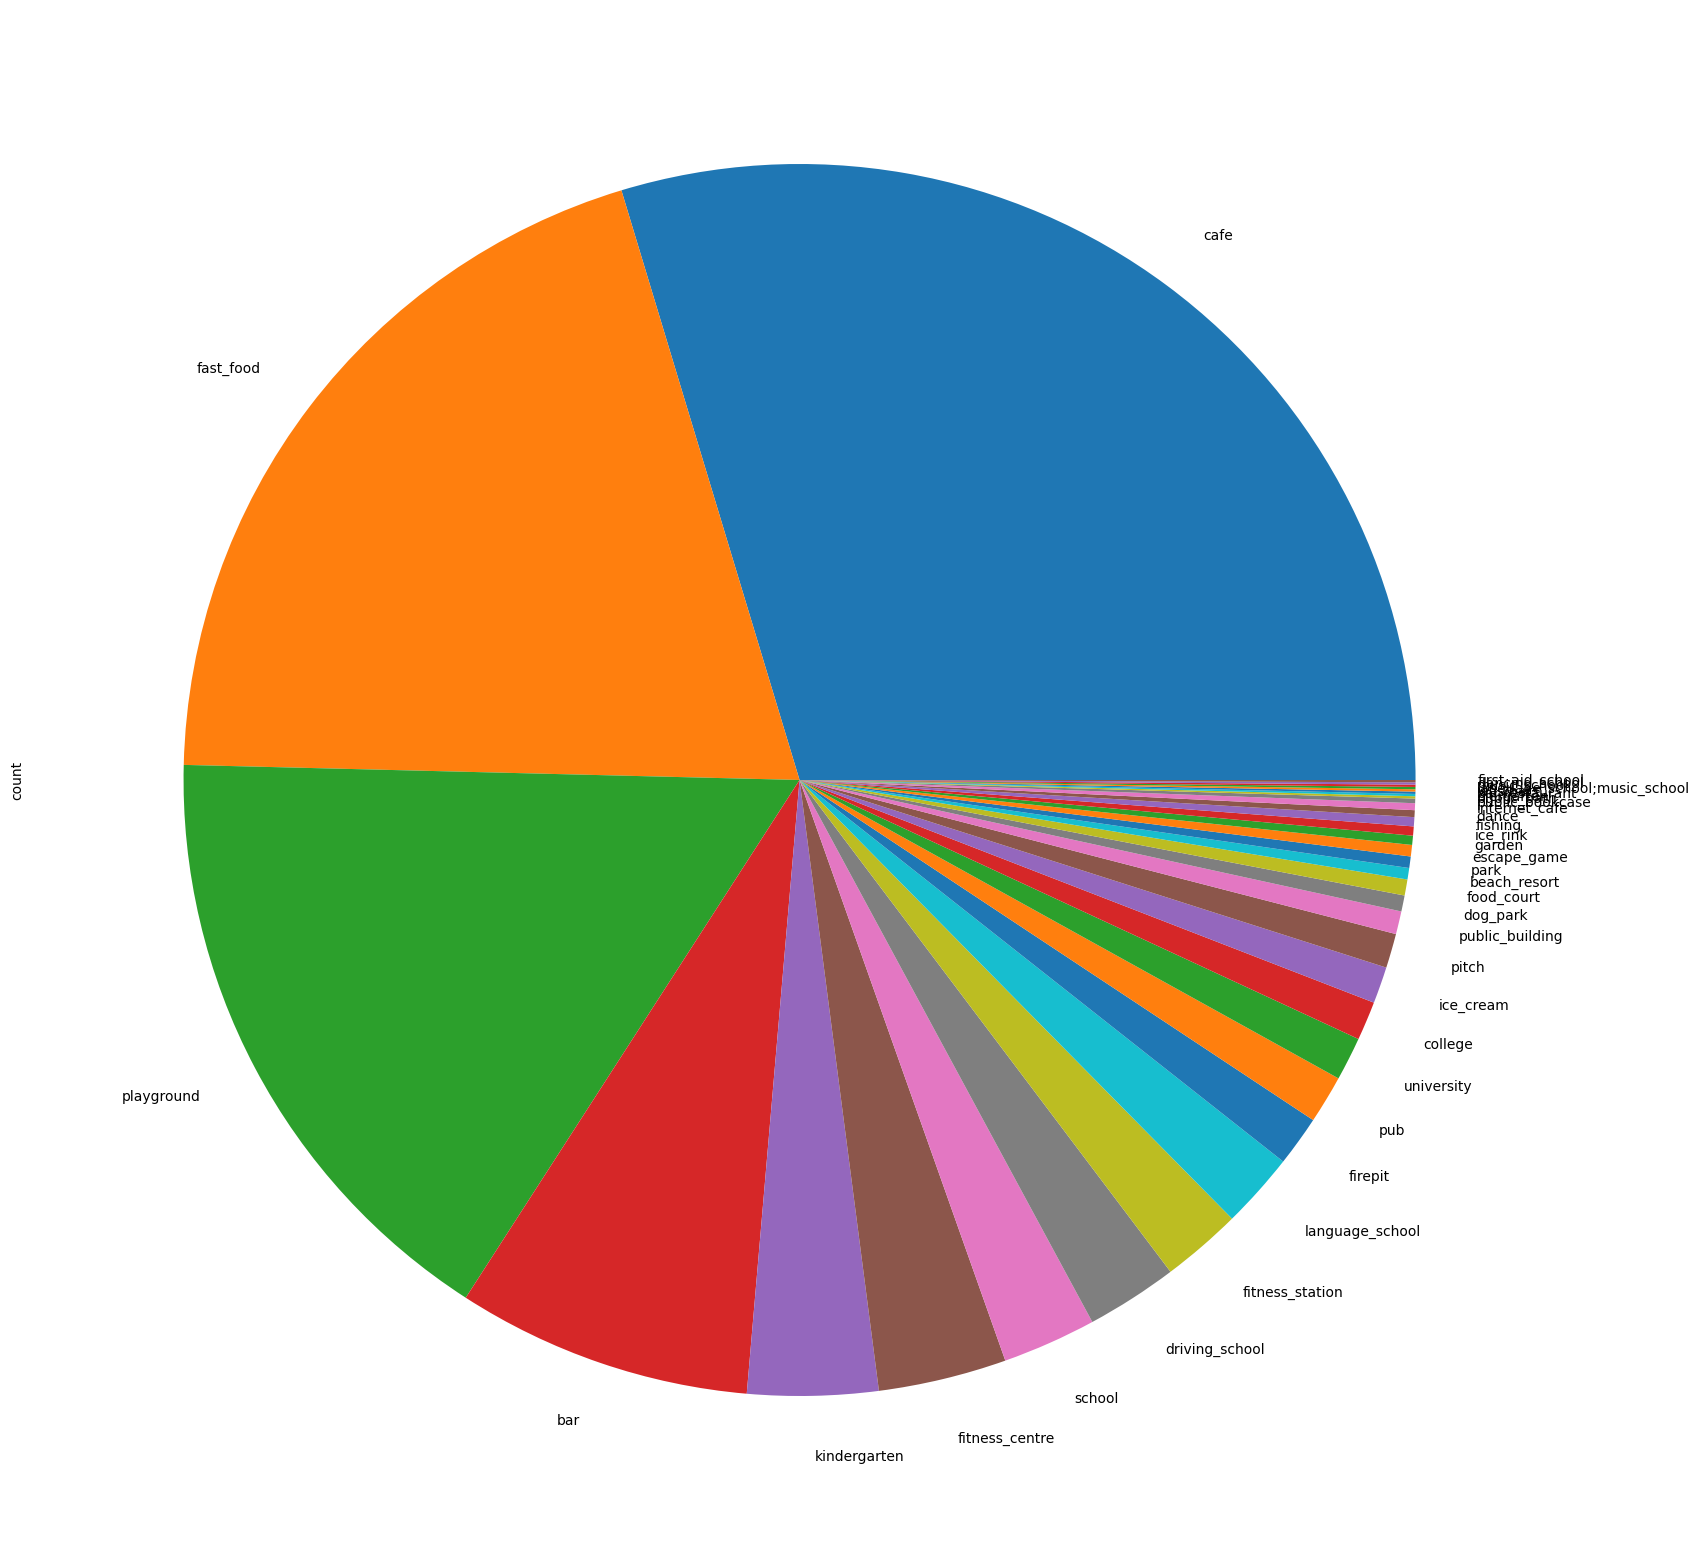

In [205]:
points_data['obj_type'].value_counts().plot(kind='pie', figsize = (20,20))

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from sklearn.model_selection import train_test_split
import xgboost as xgb

data = points_data
data.fillna(data.mean(), inplace=True)

cluster = AgglomerativeClustering(n_clusters=None)
data['cluster_label'] = cluster.fit_predict(data[['count_pos', 'count_neg', 'count_main', 'bad_dist_count', 'avarage_bad_dist']])

n_factors = 2
pca = PCA(n_components=n_factors)
factors = pca.fit_transform(data[['count_pos', 'count_neg', 'count_main', 'bad_dist_count', 'avarage_bad_dist']])
data['target_variable'] = 0.5 * factors[0] + 0.3 * factors[1] + 0.2 * data['count_main']


X = factors
y = data['target_variable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

accuracy = xgb_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# Генерируем случайные данные для примера
n_samples = 300
n_features = 5
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=3, random_state=42)

# Стандартизируем данные
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Кластеризация с k-means
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
cluster_labels = kmeans.labels_

# Оценка важности признаков для каждого кластера с использованием ANOVA
f_scores, p_values = f_classif(X, cluster_labels)

# Ранжирование признаков по важности для каждого кластера
ranked_features = np.argsort(f_scores, axis=0)[::-1]

# Вывод ранжированных признаков
for cluster in range(n_clusters):
    print(f"Cluster {cluster + 1} Features Ranking:")
    for rank, feature_idx in enumerate(ranked_features[:, cluster]):
        print(f"Rank {rank + 1}: Feature {feature_idx + 1} (F-score: {f_scores[feature_idx, cluster]:.2f})")

